#### Audio Classification Data Preprocessing

In [97]:
pip install librosa

Note: you may need to restart the kernel to use updated packages.


In [2]:
### Let's read a sample audio using librosa
import librosa
audio_file_path='empty.mpeg'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [99]:
### Let's read a sample audio using librosa
import librosa
audio_file_path='full.mp3'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [3]:
print(librosa_audio_data)

[ 0.          0.          0.         ... -0.00330681 -0.02737832
  0.        ]


In [4]:
print(librosa_sample_rate)

22050


In [5]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [6]:
import matplotlib
print(matplotlib.__version__)

3.7.2


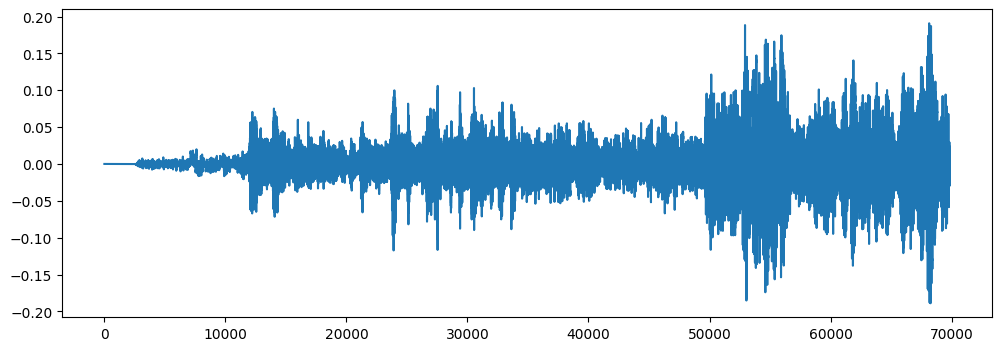

In [7]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt

# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

#### Observation
Here Librosa converts the signal to mono, meaning the channel will always be 1

In [8]:
### Lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read('empty.wav') 

In [9]:
wave_sample_rate

8000

In [10]:
wave_audio

array([[    0,     0],
       [    0,     0],
       [    0,     0],
       ...,
       [-3698, -3578],
       [-3724, -3462],
       [-4150, -5021]], dtype=int16)

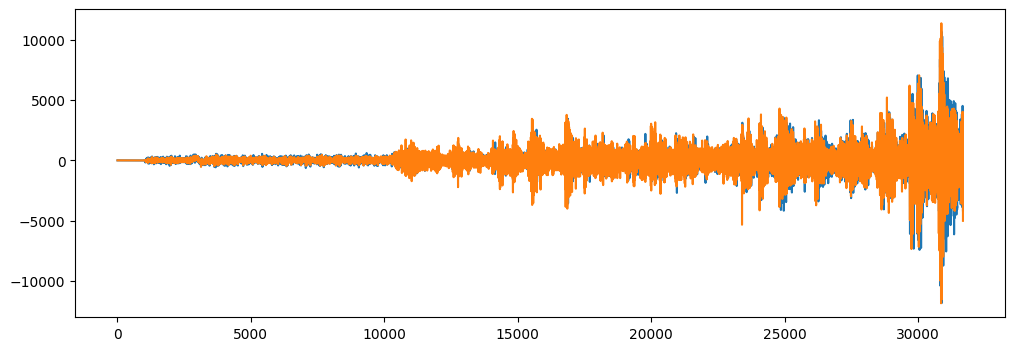

In [11]:
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

### Extract Features
Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio 
samples.
The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [12]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 137)


In [13]:
mfccs

array([[-6.5723517e+02, -6.5723517e+02, -6.5723517e+02, ...,
        -2.5489259e+02, -2.4198662e+02, -2.5045905e+02],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         8.8136795e+01,  8.8555573e+01,  8.2340965e+01],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         1.0923412e+01,  8.3662872e+00,  1.4480993e+01],
       ...,
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -4.5661597e+00, -2.3668227e+00, -1.3609287e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -5.5644369e+00,  7.4806345e-01, -4.4096708e-02],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -3.6159935e+00,  2.4271629e+00,  3.0691409e+00]], dtype=float32)

In [14]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [15]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path='E:/third year first sem/EDI/DataSet-1.1/Dataset'
metadata=pd.read_csv('E:/third year first sem/EDI/metadata1.csv')
metadata.head()

,slice_file_name,fold,classID,class
0,EB01.wav,1,1,empty
1,EB02.wav,1,1,empty
2,EB03.wav,1,1,empty
3,EB04.wav,1,1,empty
4,EB05.wav,1,1,empty


In [16]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='scipy') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features
    

In [24]:
pip install tqdm

  Obtaining dependency information for tqdm from https://files.pythonhosted.org/packages/00/e5/f12a80907d0884e6dff9c16d0c0114d81b8cd07dc3ae54c5e962cc83037e/tqdm-4.66.1-py3-none-any.whl.metadata
  Using cached tqdm-4.66.1-py3-none-any.whl.metadata (57 kB)
Using cached tqdm-4.66.1-py3-none-any.whl (78 kB)
Note: you may need to restart the kernel to use updated packages.


In [25]:
pip install --upgrade resampy



  Using cached resampy-0.4.2-py3-none-any.whl (3.1 MB)


In [17]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

 


120it [00:01, 81.37it/s]


In [18]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-376.4909, 146.52739, -31.588408, 25.383196, ...",empty
1,"[-351.7789, 168.85724, -67.08569, 34.303513, 2...",empty
2,"[-337.14053, 188.16805, -83.97901, 36.728615, ...",empty
3,"[-273.37653, 182.6911, -81.001015, 33.134083, ...",empty
4,"[-343.4883, 158.8313, -54.135056, 27.145061, 2...",empty


In [19]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [20]:
X.shape

(120, 40)

In [14]:
###y=np.array(pd.get_dummies(y))

In [21]:
y.shape

(120,)

In [27]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [28]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [22]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [119]:
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0

In [23]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [121]:
X_train

array([[-4.6055783e+02,  8.7130844e+01, -1.7243832e+01, ...,
        -5.2179246e+00,  7.4381828e-01, -5.1298757e+00],
       [-3.4348831e+02,  1.5883130e+02, -5.4135056e+01, ...,
        -6.7047030e-01, -9.0237713e-01, -3.2661688e+00],
       [-3.1558487e+02,  6.1068520e+01, -1.2165350e+00, ...,
        -3.0934792e+00, -9.7186775e+00, -4.4473653e+00],
       ...,
       [-3.7010208e+02,  1.0952803e+02,  1.3580346e+01, ...,
         3.6765185e-01, -1.1440004e+00, -1.6007373e-01],
       [-2.7151642e+02,  7.0621254e+01,  1.5900015e+01, ...,
        -8.4276819e+00, -3.3450084e+00, -2.9126642e+00],
       [-3.0779028e+02,  8.1654976e+01,  1.5188535e+01, ...,
        -3.9079976e+00,  3.7902393e+00,  3.7520286e-01]], dtype=float32)

In [24]:
X_train.shape

(96, 40)

In [123]:
X_test.shape

(24, 40)

In [124]:
y_train.shape

(96, 3)

In [36]:
y_test.shape

(24, 3)

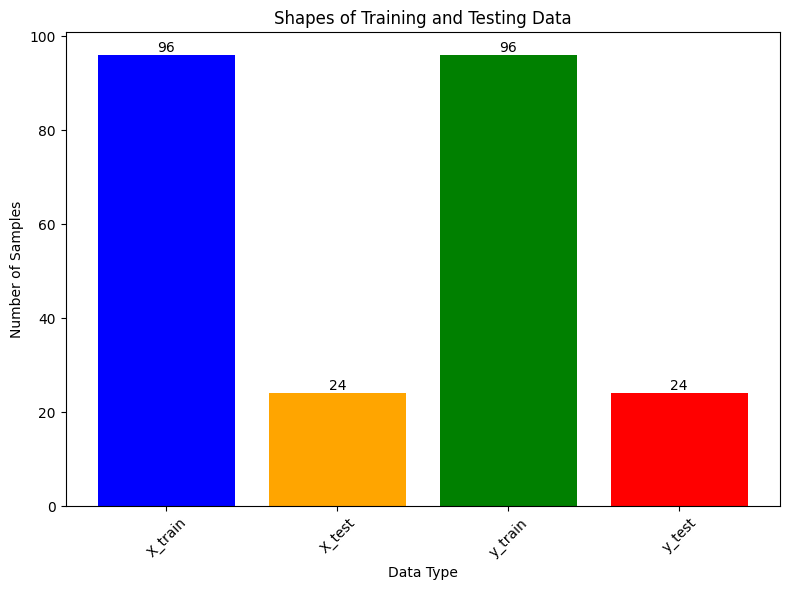

In [25]:
import matplotlib.pyplot as plt

# Sample data shapes
X_train_shape = X_train.shape[0]
X_test_shape = X_test.shape[0]
y_train_shape = y_train.shape[0]
y_test_shape = y_test.shape[0]

# Labels for the bars
labels = ['X_train', 'X_test', 'y_train', 'y_test']

# Data for the bars
data_shapes = [X_train_shape, X_test_shape, y_train_shape, y_test_shape]

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(labels, data_shapes, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Data Type')
plt.ylabel('Number of Samples')
plt.title('Shapes of Training and Testing Data')
plt.xticks(rotation=45)
plt.tight_layout()

# Annotate the bars with the shapes
for i, v in enumerate(data_shapes):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=10)

# Show the plot
plt.show()


### Model Creation

In [26]:
import tensorflow as tf
print(tf.__version__)

2.13.0


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [28]:
### No of classes
num_labels=y.shape[1]

In [29]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [130]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 100)               4100      
                                                                 
 activation_32 (Activation)  (None, 100)               0         
                                                                 
 dropout_24 (Dropout)        (None, 100)               0         
                                                                 
 dense_33 (Dense)            (None, 200)               20200     
                                                                 
 activation_33 (Activation)  (None, 200)               0         
                                                                 
 dropout_25 (Dropout)        (None, 200)               0         
                                                                 
 dense_34 (Dense)            (None, 100)              

In [30]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [31]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 35

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
1/3 [=========>....................] - ETA: 1s - loss: 48.7255 - accuracy: 0.3429
Epoch 1: val_loss improved from inf to 10.28244, saving model to saved_models\audio_classification.hdf5
3/3 [==============================] - 1s 95ms/step - loss: 46.7018 - accuracy: 0.3125 - val_loss: 10.2824 - val_accuracy: 0.2500
Epoch 2/100
1/3 [=========>....................] - ETA: 0s - loss: 51.7664 - accuracy: 0.3429
Epoch 2: val_loss improved from 10.28244 to 5.89478, saving model to saved_models\audio_classification.hdf5
3/3 [==============================] - 0s 22ms/step - loss: 45.9544 - accuracy: 0.3542 - val_loss: 5.8948 - val_accuracy: 0.3750
Epoch 3/100
1/3 [=========>....................] - ETA: 0s - loss: 42.6298 - accuracy: 0.3143
Epoch 3: val_loss improved from 5.89478 to 4.73672, saving model to saved_models\audio_classification.hdf5
3/3 [==============================] - 0s 23ms/step - loss: 40.5652 - accuracy: 0.3438 - val_loss: 4.7367 - val_accuracy: 0.6250
Epoch 4/100

c:\Users\dhanu\Envs\test\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 5/100
1/3 [=========>....................] - ETA: 0s - loss: 25.2908 - accuracy: 0.5143
Epoch 5: val_loss improved from 4.40352 to 4.17458, saving model to saved_models\audio_classification.hdf5
3/3 [==============================] - 0s 24ms/step - loss: 25.7009 - accuracy: 0.4792 - val_loss: 4.1746 - val_accuracy: 0.6250
Epoch 6/100
1/3 [=========>....................] - ETA: 0s - loss: 28.0042 - accuracy: 0.3143
Epoch 6: val_loss did not improve from 4.17458
3/3 [==============================] - 0s 15ms/step - loss: 25.8938 - accuracy: 0.3438 - val_loss: 4.2360 - val_accuracy: 0.6250
Epoch 7/100
1/3 [=========>....................] - ETA: 0s - loss: 28.2039 - accuracy: 0.3714
Epoch 7: val_loss improved from 4.17458 to 4.02716, saving model to saved_models\audio_classification.hdf5
3/3 [==============================] - 0s 23ms/step - loss: 25.4872 - accuracy: 0.3542 - val_loss: 4.0272 - val_accuracy: 0.6250
Epoch 8/100
1/3 [=========>....................] - ETA: 0s - loss: 16.

In [133]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

1.0


In [80]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


1/1 [==============================] - 0s 61ms/step


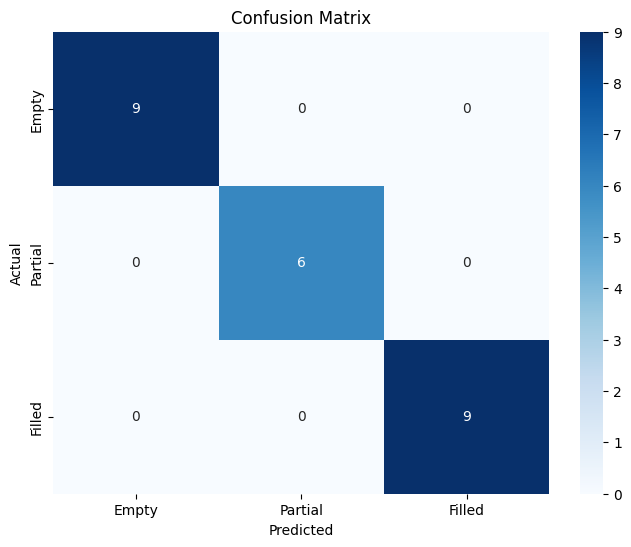

In [32]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have already trained and compiled your model

# Predict classes for the test set
predicted_classes = model.predict(X_test)
predicted_classes = np.argmax(predicted_classes, axis=1)  # Convert probabilities to class labels

# Compute the confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), predicted_classes)

# Define class label names
label_names = ["Empty", "Partial", "Filled"]

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_names, yticklabels=label_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### Testing Some Test Audio Data

Steps
- Preprocess the new audio data
- predict the classes
- Invere transform your Predicted Label

In [33]:
from sklearn.preprocessing import LabelEncoder

# Fitting the LabelEncoder once with all possible class labels
labelencoder = LabelEncoder()
labelencoder.fit(label_names)  # Replace with your actual class labels

# Load and process the audio
filename = "empty.wav"
audio, sample_rate = librosa.load(filename, res_type='scipy') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)

# Predicting the class
predicted_probabilities = model.predict(mfccs_scaled_features)
predicted_class_index = np.argmax(predicted_probabilities)

# Transform the predicted class index back to the original label
predicted_class_label = labelencoder.inverse_transform([predicted_class_index])
print(predicted_class_label)


1/1 [==============================] - 0s 14ms/step
['Empty']


In [60]:
import numpy as np
import sounddevice as sd
import librosa
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

# Load your trained model here
# model = ...
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

# Load any necessary label encoder or preprocessing steps
# labelencoder = ...

# Define the number of audio samples to capture per chunk
chunk_size = 22050  # Adjust this value based on your needs

# Set up audio stream for real-time capture
sample_rate = 22050  # Adjust this value based on your needs
sd.default.samplerate = sample_rate
sd.default.channels = 1  # Adjust this value based on your needs

def process_audio_chunk(indata, frames, time, status):
    global model
    
    # Convert the audio chunk to mono if it's stereo
    audio_mono = np.mean(indata, axis=1)
    
    # Perform feature extraction
    mfccs_features = librosa.feature.mfcc(y=audio_mono, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
    
    # Reshape and predict
    mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)
    predicted_probabilities = model.predict(mfccs_scaled_features)
    predicted_class_index = np.argmax(predicted_probabilities)
    predicted_class_label = labelencoder.inverse_transform([predicted_class_index])
    
    print("Predicted class:", predicted_class_label[0])  # Convert numpy array to string

# Start capturing audio in real-time
with sd.InputStream(callback=process_audio_chunk, blocksize=chunk_size):
    print("Listening for real-time audio...")
    sd.sleep(10000)  # Adjust this value based on how long you want to listen


Listening for real-time audio...
1/1 [==============================] - 0s 45ms/step
Predicted class: Filled
1/1 [==============================] - 0s 14ms/step
Predicted class: Filled
1/1 [==============================] - 0s 14ms/step
Predicted class: Filled
1/1 [==============================] - 0s 15ms/step
Predicted class: Filled
1/1 [==============================] - 0s 15ms/step
Predicted class: Filled
1/1 [==============================] - 0s 14ms/step
Predicted class: Filled
1/1 [==============================] - 0s 15ms/step
Predicted class: Filled
1/1 [==============================] - 0s 16ms/step
Predicted class: Filled
1/1 [==============================] - 0s 15ms/step
Predicted class: Filled
